In [ ]:
[
 HighBP, HighChol, HeartDiseaseorAttack, Stroke,
 Smoker, PhysActivity, DiffWalk,
 BMI, MentHlth, PhysHlth, GenHlth,
 Sex, Age, HvyAlcoholConsump,
]




Age,Sex,BMI,HighBP,PhysActivity, Smoker, HighChol,HeartDiseaseorAttack,Stroke,DiffWalk,MentHlth,PhysHlth,GenHlth,HvyAlcoholConsump

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv("cdc_diabetes_health_indicators.csv")

In [3]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [4]:
features = [
    "Diabetes_binary","HighBP", "HighChol", "HeartDiseaseorAttack", "Stroke",
    "Smoker", "PhysActivity", "DiffWalk",
    "BMI", "MentHlth", "PhysHlth", "GenHlth",
    "Sex", "Age", "HvyAlcoholConsump",
]

In [5]:
df = data[features]

df = df.dropna()

x = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [6]:
x.head()

,HighBP,HighChol,HeartDiseaseorAttack,Stroke,Smoker,PhysActivity,DiffWalk,BMI,MentHlth,PhysHlth,GenHlth,Sex,Age,HvyAlcoholConsump
0,1,1,0,0,1,0,1,40,18,15,5,0,9,0
1,0,0,0,0,1,1,0,25,0,0,3,0,7,0
2,1,1,0,0,0,0,1,28,30,30,5,0,9,0
3,1,0,0,0,0,1,0,27,0,0,2,0,11,0
4,1,1,0,0,0,1,0,24,3,0,2,0,11,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [15]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'scale_pos_weight': [1, 2, 3, 5, 7, 10, 15, 20],
    'learning_rate': [0.05],
    'n_estimators': [300],
    'max_depth': [4, 5]
}

model = XGBClassifier(
    eval_metric='aucpr',
    use_label_encoder=False,
    colsample_bytree=0.8,
    random_state=42
)

grid_search = GridSearchCV(model, param_grid=params, scoring='f1', cv=3, verbose=1)
grid_search.fit(x_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_probs = best_model.predict_proba(x_test)[:, 1]
y_pred = (y_probs > 0.65).astype(int)  # or tune this later

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-package

Accuracy: 0.8576553137811416
Confusion Matrix:
 [[61848  3652]
 [ 7181  3423]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     65500
           1       0.48      0.32      0.39     10604

    accuracy                           0.86     76104
   macro avg       0.69      0.63      0.65     76104
weighted avg       0.84      0.86      0.85     76104



In [17]:

xgb_base = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    eval_metric='aucpr',
    use_label_encoder=False,
    objective='binary:logistic',
    verbosity=1
)

# Grid of hyperparameters to try
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "n_estimators": [100, 300],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Setup GridSearch
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',  # or 'recall' if recall is your #1 priority
    cv=3,
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit search
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [18]:

y_probs = grid_search.best_estimator_.predict_proba(x_test)[:, 1]

# Optional: pick threshold that gives best f1/recall
threshold = 0.65
y_pred = (y_probs > threshold).astype(int)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8053715967623253
Confusion Matrix:
 [[54778 10722]
 [ 4090  6514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     65500
           1       0.38      0.61      0.47     10604

    accuracy                           0.81     76104
   macro avg       0.65      0.73      0.67     76104
weighted avg       0.85      0.81      0.82     76104



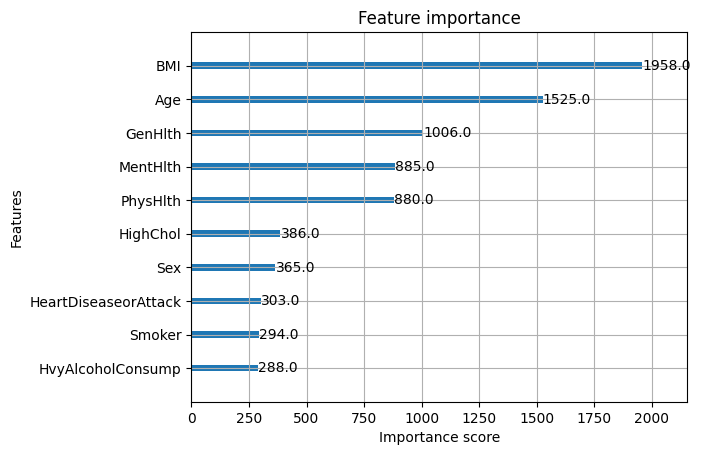

In [14]:
import matplotlib.pyplot as plt
xgb.plot_importance(grid_search.best_estimator_, max_num_features=10)
plt.show()

In [14]:
from sklearn.metrics import precision_recall_curve

# y_test: true labels
# y_probs: predicted probabilities for class 1 (diabetic)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Print all thresholds where recall > 0.80 and precision > 0.50
for p, r, t in zip(precision, recall, thresholds):
    if r > 0.80 and p > 0.5:
        print(f"Threshold: {t:.2f}, Precision: {p:.2f}, Recall: {r:.2f}")

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [10]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Diabetes_binary
0    152834
1     24742
Name: count, dtype: int64
After SMOTE: Diabetes_binary
0    152834
1    152834
Name: count, dtype: int64


In [11]:
x_train

,HighBP,HighChol,HeartDiseaseorAttack,Stroke,Smoker,PhysActivity,DiffWalk,BMI,MentHlth,PhysHlth,GenHlth,Sex,Age,HvyAlcoholConsump
231121,0,1,0,0,1,1,0,22,0,0,2,0,12,0
145098,0,1,0,0,1,1,1,23,0,3,2,0,7,1
101727,0,0,0,0,0,1,0,27,0,0,1,1,8,1
229088,1,0,0,0,1,1,0,28,7,0,2,0,3,0
228686,0,0,0,0,1,1,0,26,0,0,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134394,0,1,0,0,1,0,0,29,0,1,3,0,9,0
209330,0,0,0,0,0,0,0,26,0,25,2,0,3,0
179576,0,1,0,0,0,1,0,26,10,25,3,0,13,0
246770,1,1,1,1,1,1,0,35,0,10,3,1,10,0


In [12]:


base_svc = LinearSVC(random_state=42, max_iter=10000)
model = CalibratedClassifierCV(base_svc)  # Adds probability support
model.fit(x_train_resampled, y_train_resampled)


CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000, random_state=42))

In [28]:
import numpy as np

def predict_diabetes(model, HighBP, HighChol, HeartDiseaseorAttack, Stroke, Smoker, PhysActivity, DiffWalk, BMI, MentHlth, PhysHlth, GenHlth, Sex, Age, HvyAlcoholConsump):
    # Match feature order used during training
    new_patient = [
        Age, Sex, BMI, HighBP, PhysActivity,
        Smoker, HighChol, HeartDiseaseorAttack,
        Stroke, DiffWalk, MentHlth, PhysHlth,
        GenHlth, HvyAlcoholConsump
    ]
    
    # Convert to 2D array for prediction
    input_array = np.array(new_patient).reshape(1, -1)
    
    # Make prediction
    prediction = model.predict(input_array)

    # Display result
    if prediction[0] == 1:
        print("⚠️  The patient is likely diabetic.")
    else:
        print("✅  The patient is likely not diabetic.")
    
    return prediction[0]


In [29]:
predict_diabetes(
    model=model,
    HighBP=1,
    HighChol=1,
    HeartDiseaseorAttack=1,
    Stroke=1,
    Smoker=1,
    PhysActivity=1,
    DiffWalk=1,
    BMI=34, 
    MentHlth=0,
    PhysHlth=7,
    GenHlth=4,
    Sex=0,
    Age=9,
    HvyAlcoholConsump=0,
)

NotFittedError: need to call fit or load_model beforehand

In [15]:
import pandas as pd
from sklearn.utils import resample

# If x_train is a NumPy array, convert it to DataFrame
# Provide feature names if needed
feature_names = [
    "HighBP", "HighChol", "HeartDiseaseorAttack", "Stroke",
    "Smoker", "PhysActivity", "DiffWalk",
    "BMI", "MentHlth", "PhysHlth", "GenHlth",
    "Sex", "Age", "HvyAlcoholConsump"
]
x_train_df = pd.DataFrame(x_train, columns=feature_names)

# Convert y_train to Series
y_train_series = pd.Series(y_train, name="Diabetes_binary")

# Combine X and y into one DataFrame
train_data = pd.concat([x_train_df, y_train_series], axis=1)

# Separate majority and minority classes
df_majority = train_data[train_data['Diabetes_binary'] == 0]
df_minority = train_data[train_data['Diabetes_binary'] == 1]

In [16]:
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combine for balanced data
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle and reset index
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Final X and y for SHAP
x_shap = df_balanced.drop(columns=['Diabetes_binary'])
y_shap = df_balanced['Diabetes_binary']

In [17]:
x_shap.head()

,HighBP,HighChol,HeartDiseaseorAttack,Stroke,Smoker,PhysActivity,DiffWalk,BMI,MentHlth,PhysHlth,GenHlth,Sex,Age,HvyAlcoholConsump
0,1,1,0,0,0,0,0,33,0,3,3,0,9,0
1,1,1,0,0,0,0,1,40,0,9,3,0,11,0
2,1,1,0,0,0,1,1,33,15,10,4,1,8,0
3,0,1,0,0,0,1,0,21,0,30,5,1,6,0
4,1,1,0,0,0,0,1,39,0,30,4,0,13,0


In [18]:
y_shap.head()

0    1
1    1
2    1
3    1
4    0
Name: Diabetes_binary, dtype: int64

In [19]:
import joblib

# Save the model
joblib.dump(model, 'final_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the balanced SHAP input data
x_shap.to_csv('x_shap.csv', index=False)
y_shap.to_csv('y_shap.csv', index=False)


In [20]:
predict_diabetes(
    model=model,
    scaler=scaler,
    HighBP=0,
    HighChol=0,
    HeartDiseaseorAttack=0,
    Stroke=0,
    Smoker=1,
    PhysActivity=1,
    DiffWalk=0,
    BMI=25, 
    MentHlth=0,
    PhysHlth=0,
    GenHlth=3,
    Sex=0,
    Age=7,
    HvyAlcoholConsump=0,
)

⚠️  The patient is likely diabetic.


C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
base_svc = LinearSVC(random_state=42, max_iter=10000)

# Step 2: Wrap it with CalibratedClassifierCV to enable predict_proba
model = CalibratedClassifierCV(base_svc)

# Step 3: Fit the model
model.fit(x_train_resampled, y_train_resampled)

# Step 4: Predict
y_pred = model.predict(x_test_scaled)

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7304083885209713
Confusion Matrix:
 [[47512 17988]
 [ 2529  8075]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     65500
           1       0.31      0.76      0.44     10604

    accuracy                           0.73     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104

